# Car price prediction

## Step 1: Reading and understanding the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()
%config InlineBackend.figure_format='retina'

In [2]:
price = pd.read_csv('CarPrice_Assignment.csv')
price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
price.shape

(205, 26)

In [4]:
list(price.columns)

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [5]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
price.symboling = price.symboling.astype('str')

In [7]:
price.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
var_cat = price.select_dtypes('object').columns
var_num = price.select_dtypes(exclude=['object']).columns
print(list(var_cat))
print(list(var_num))

['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
['car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [9]:
for i in var_cat:
    print(f'{i} : {price[i].value_counts().count()}')

symboling : 6
CarName : 147
fueltype : 2
aspiration : 2
doornumber : 2
carbody : 5
drivewheel : 3
enginelocation : 2
enginetype : 7
cylindernumber : 7
fuelsystem : 8


## Step 2: Data visualization

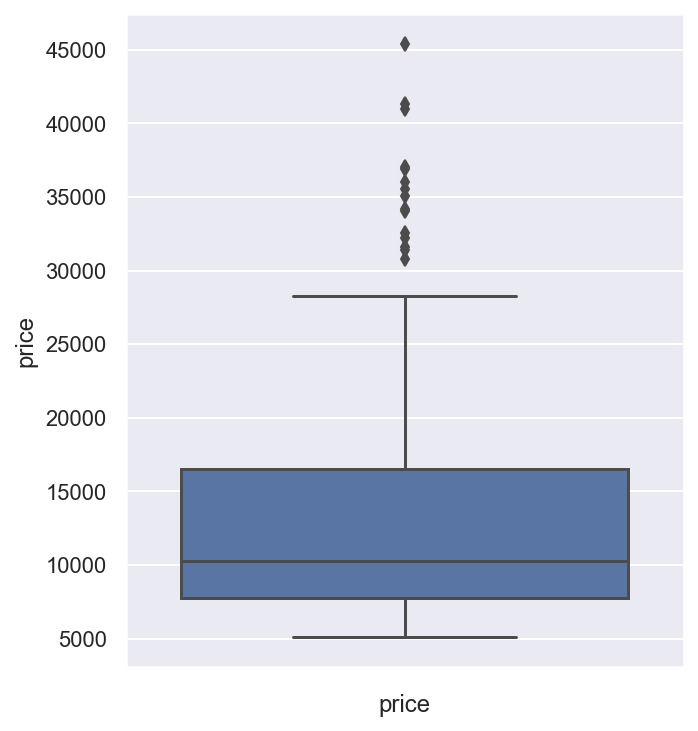

In [10]:
plt.figure(figsize=(5,6))
sns.boxplot(price.price,orient="v")
plt.xlabel('price')
plt.show()

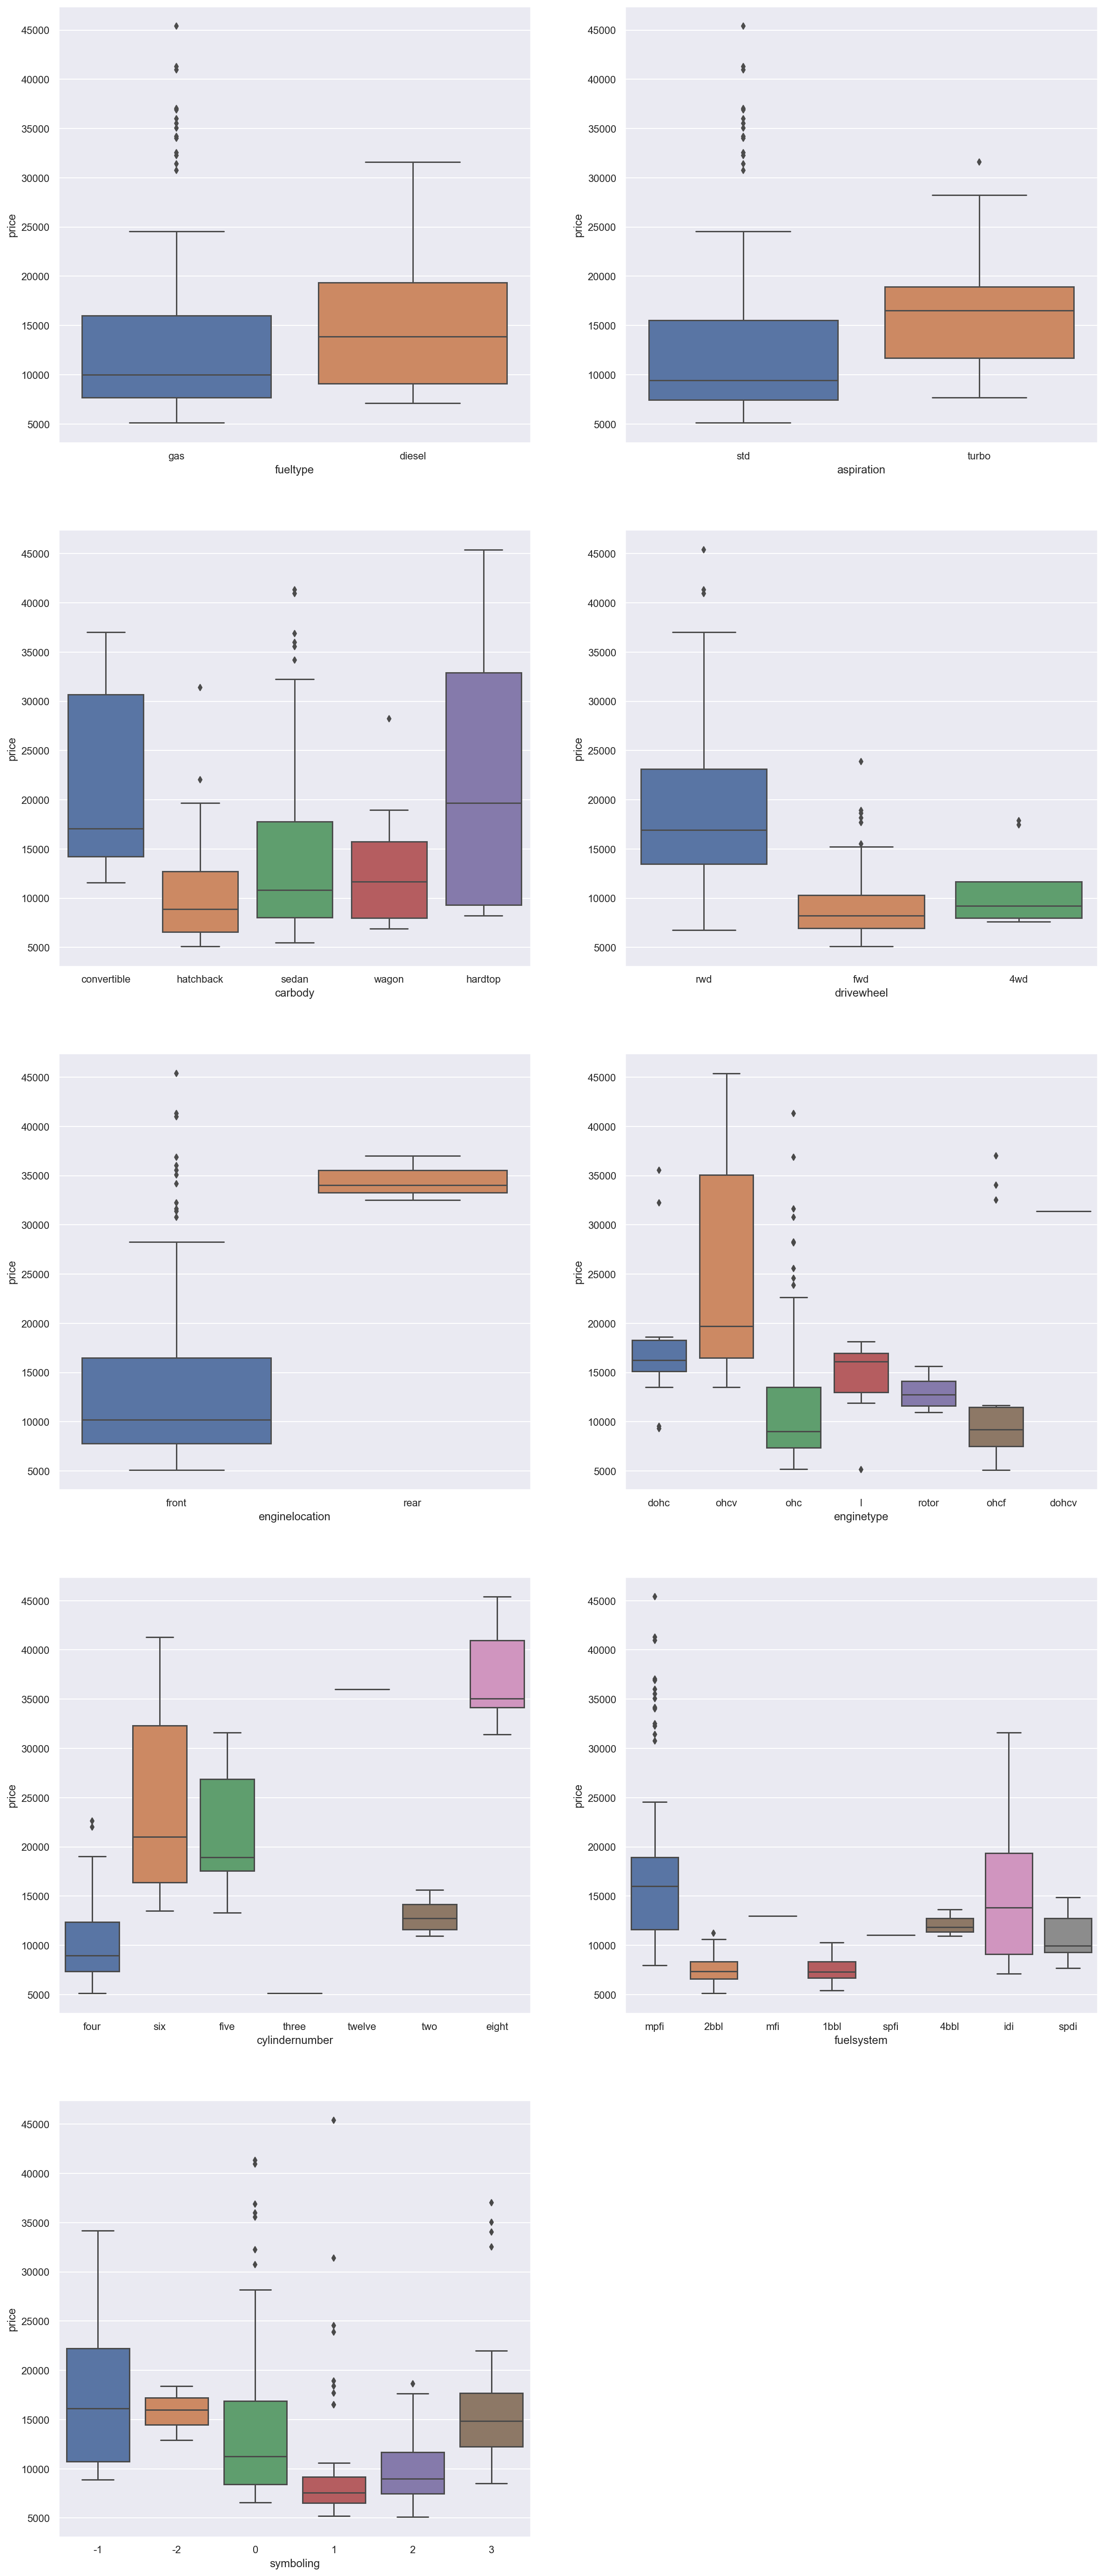

In [11]:
# symboling : 6
# CarName : 147
# fueltype : 2
# aspiration : 2
# doornumber : 2
# carbody : 5
# drivewheel : 3
# enginelocation : 2
# enginetype : 7
# cylindernumber : 7
# fuelsystem : 8
plt.figure(figsize=(20,50))
plt.subplot(5,2,1)
sns.boxplot(data=price, x="fueltype", y="price", orient="v")
plt.subplot(5,2,2)
sns.boxplot(data=price, x="aspiration", y="price", orient="v")
plt.subplot(5,2,3)
sns.boxplot(data=price, x="carbody", y="price", orient="v")
plt.subplot(5,2,4)
sns.boxplot(data=price, x="drivewheel", y="price", orient="v")
plt.subplot(5,2,5)
sns.boxplot(data=price, x="enginelocation", y="price", orient="v")
plt.subplot(5,2,6)
sns.boxplot(data=price, x="enginetype", y="price", orient="v")
plt.subplot(5,2,7)
sns.boxplot(data=price, x="cylindernumber", y="price", orient="v")
plt.subplot(5,2,8)
sns.boxplot(data=price, x="fuelsystem", y="price", orient="v")
plt.subplot(5,2,9)
sns.boxplot(data=price, x="symboling", y="price", orient="v")
plt.show()

In [12]:
price["CarCompany"] = price["CarName"].apply(lambda x:x.split(" ")[0])
price.CarCompany.value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
alfa-romero     3
jaguar          3
maxda           2
renault         2
vw              2
toyouta         1
porcshce        1
Nissan          1
vokswagen       1
mercury         1
Name: CarCompany, dtype: int64

In [13]:
price["CarCompany"] = price["CarCompany"].replace({"vw":"volkswagen","toyouta":"toyota",
                                                    "porcshce":"porsche","maxda":"mazda",
                                                    "vokswagen":"volkswagen"})

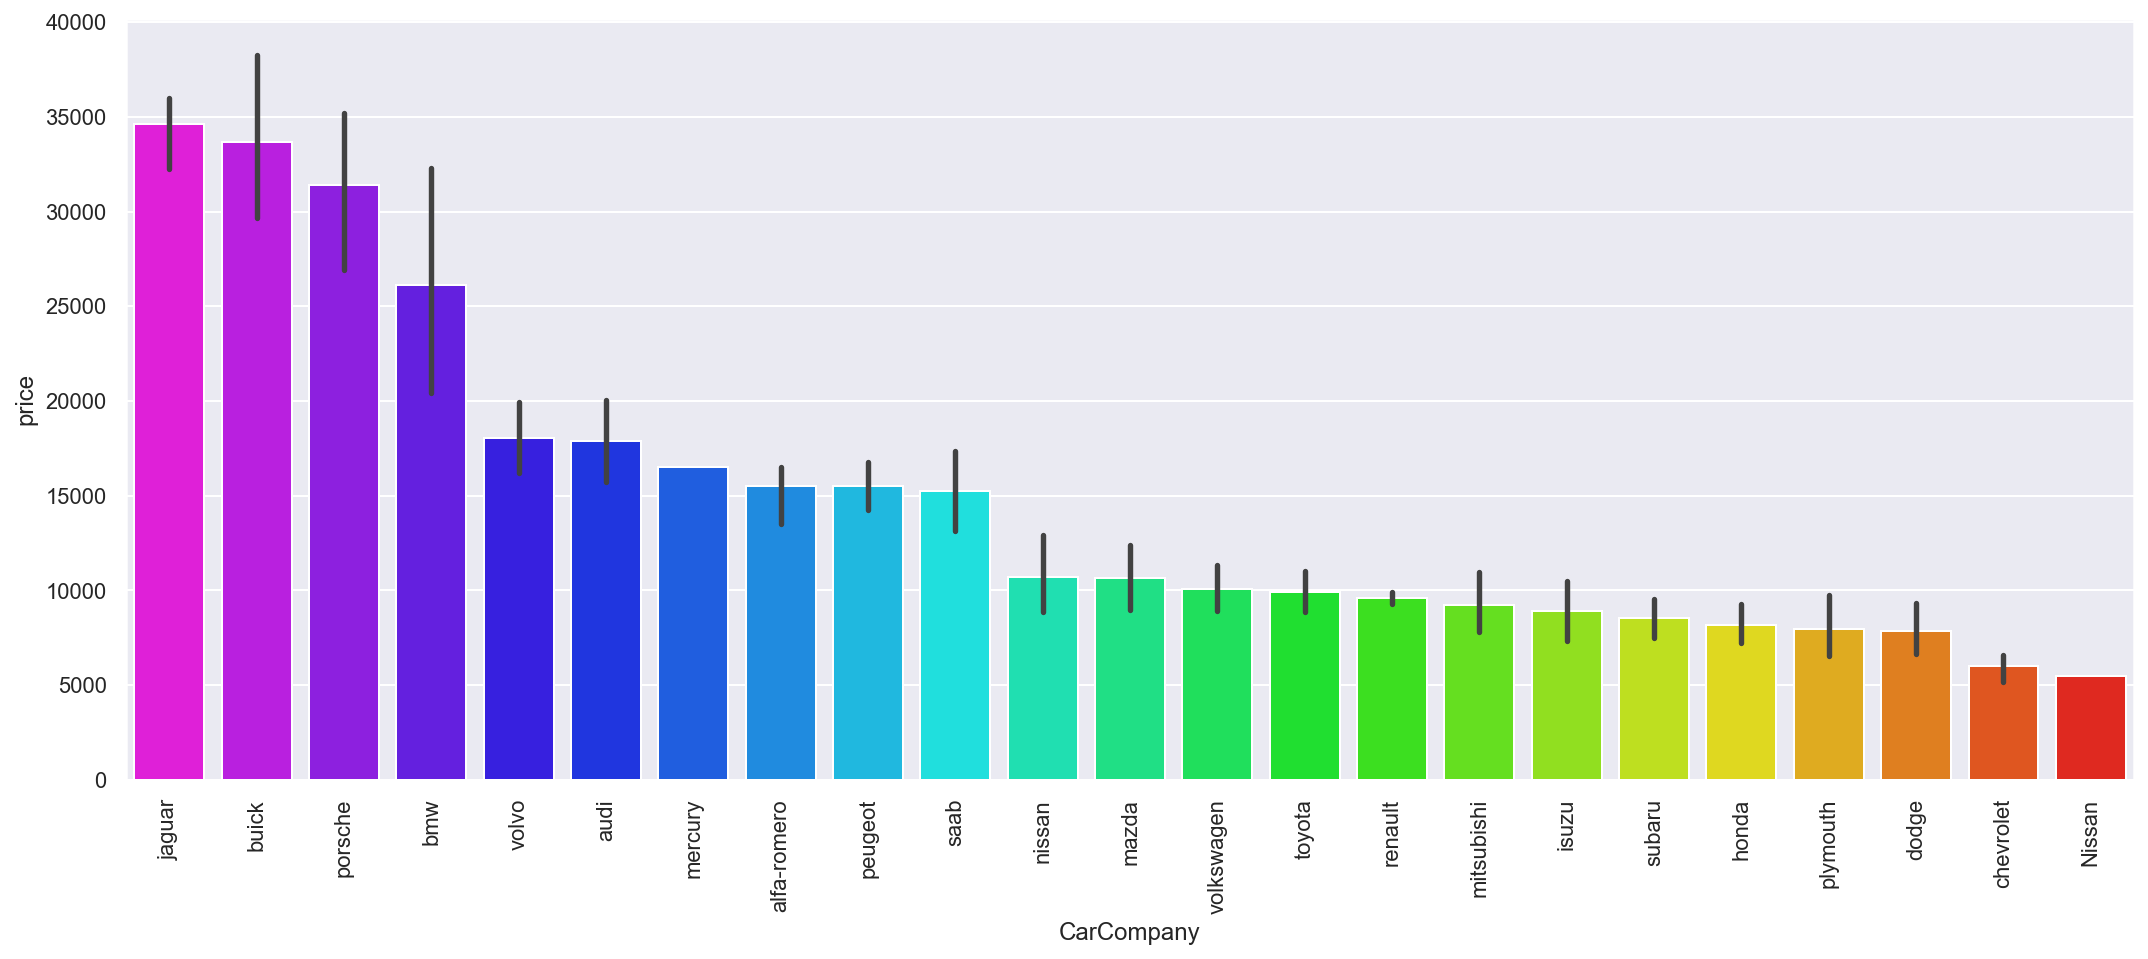

In [14]:
order1 = price.groupby(by=["CarCompany"])["price"].mean().reset_index().sort_values('price',ascending=False)
plt.figure(figsize=(18,7))
sns.barplot(data=price, x=price.CarCompany, y=price.price, palette="gist_rainbow_r",
           order=order1.CarCompany)
plt.xticks(rotation=90)
plt.show()

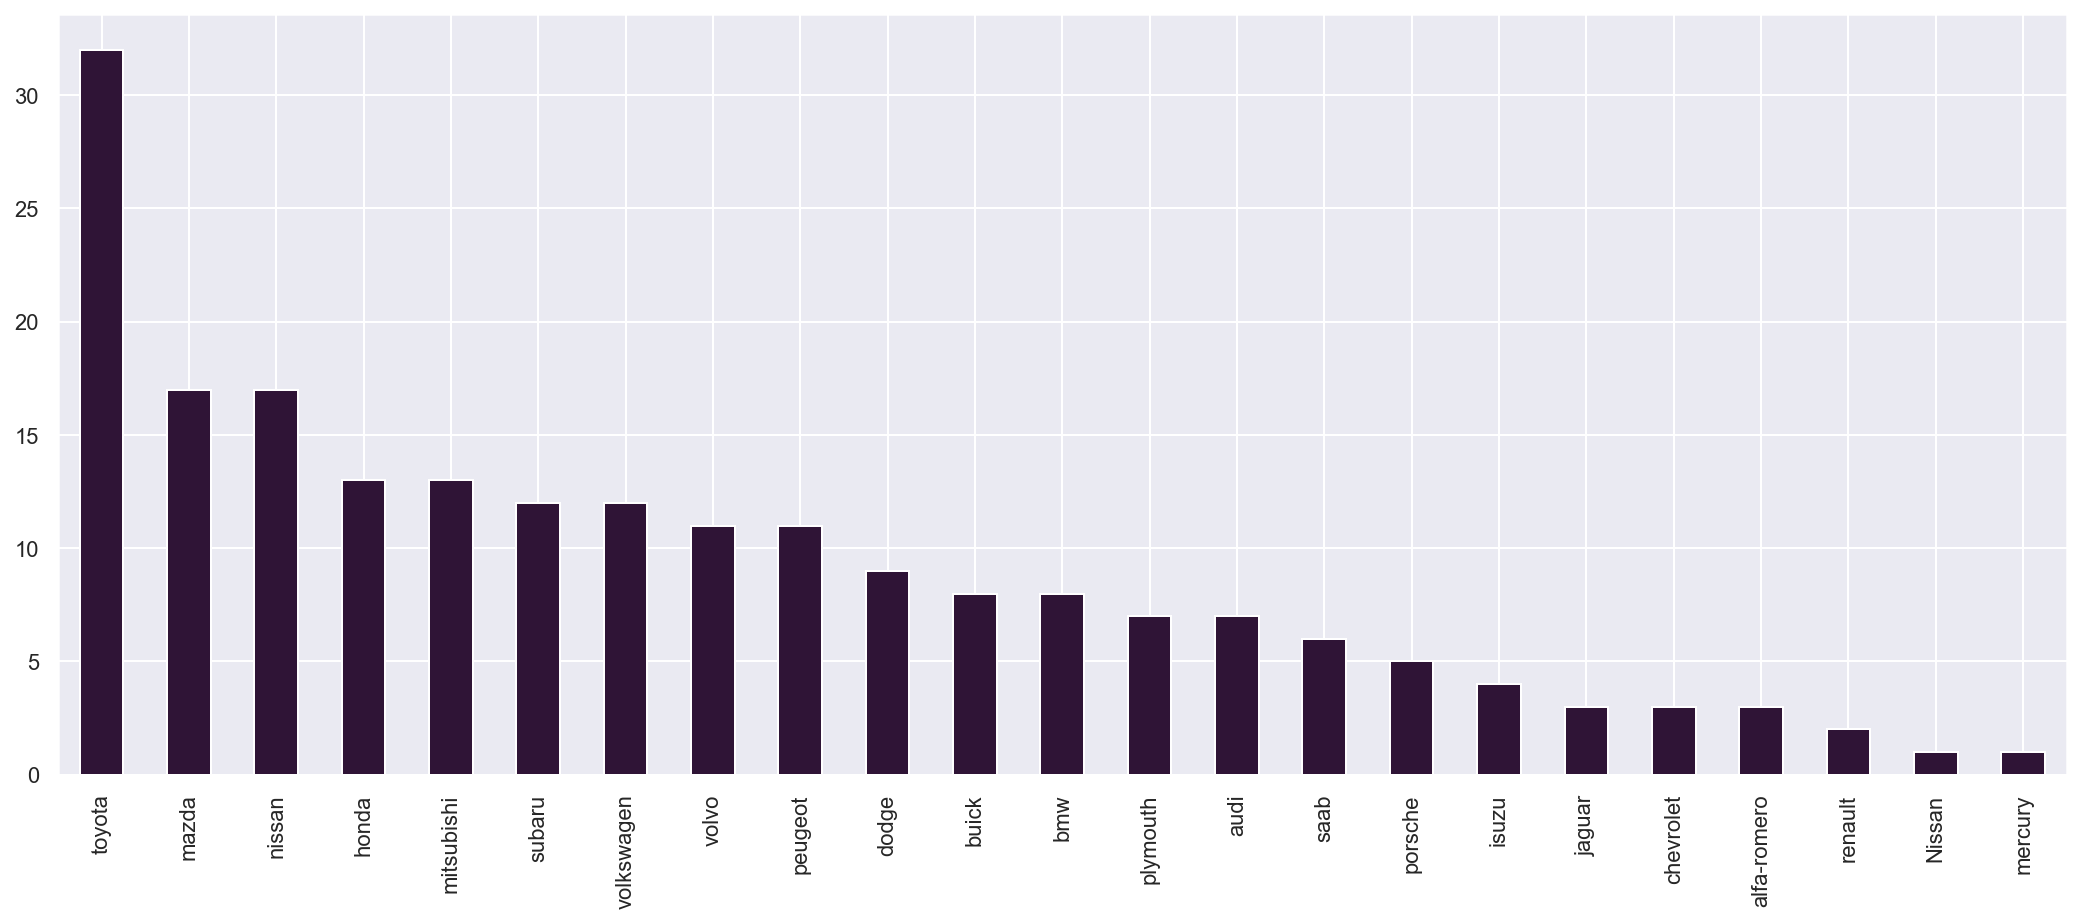

In [15]:
plt.figure(figsize=(18,7))
price.CarCompany.value_counts(ascending=False).plot(kind="bar",stacked=True, 
                                                    colormap = 'twilight_shifted_r')
# sns.countplot(x=price.CarCompany)
plt.xticks(rotation=90)
plt.show()

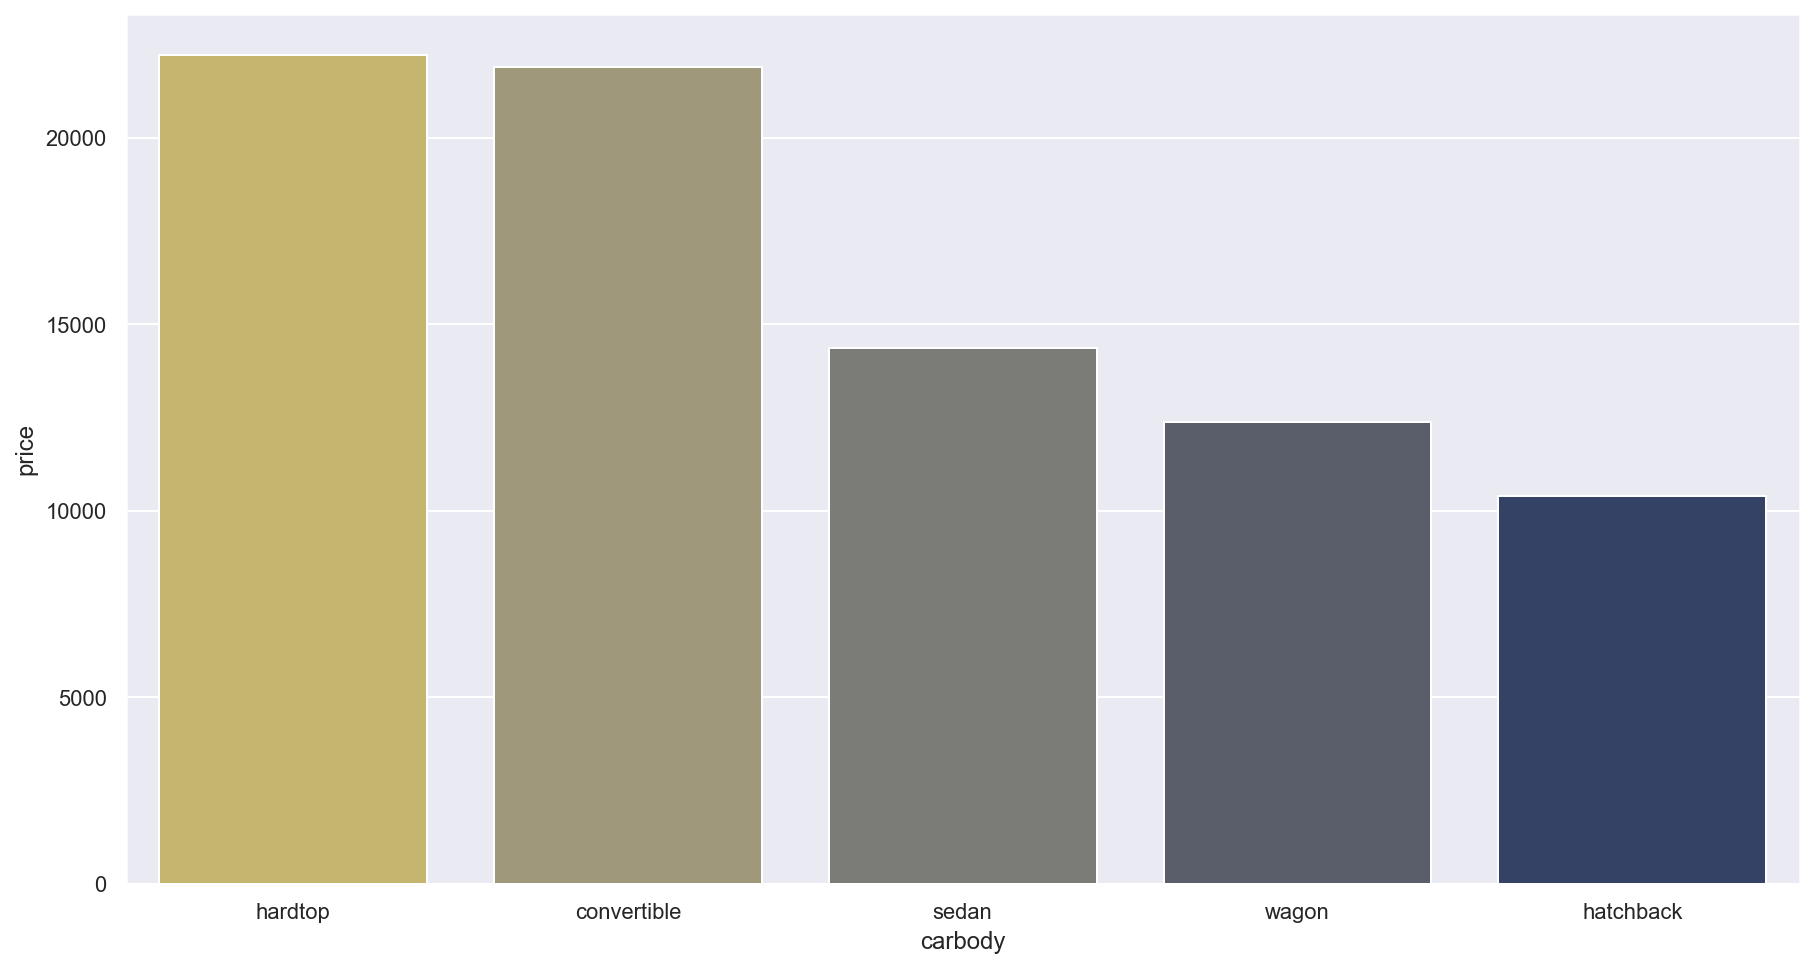

In [16]:
order2 = price.groupby(["carbody"])['price'].mean().reset_index().sort_values('price',ascending=False)
plt.figure(figsize=(15,8))
sns.barplot(data=price, x="carbody", y="price", order=order2.carbody, ci=None, palette="cividis_r")
plt.show()

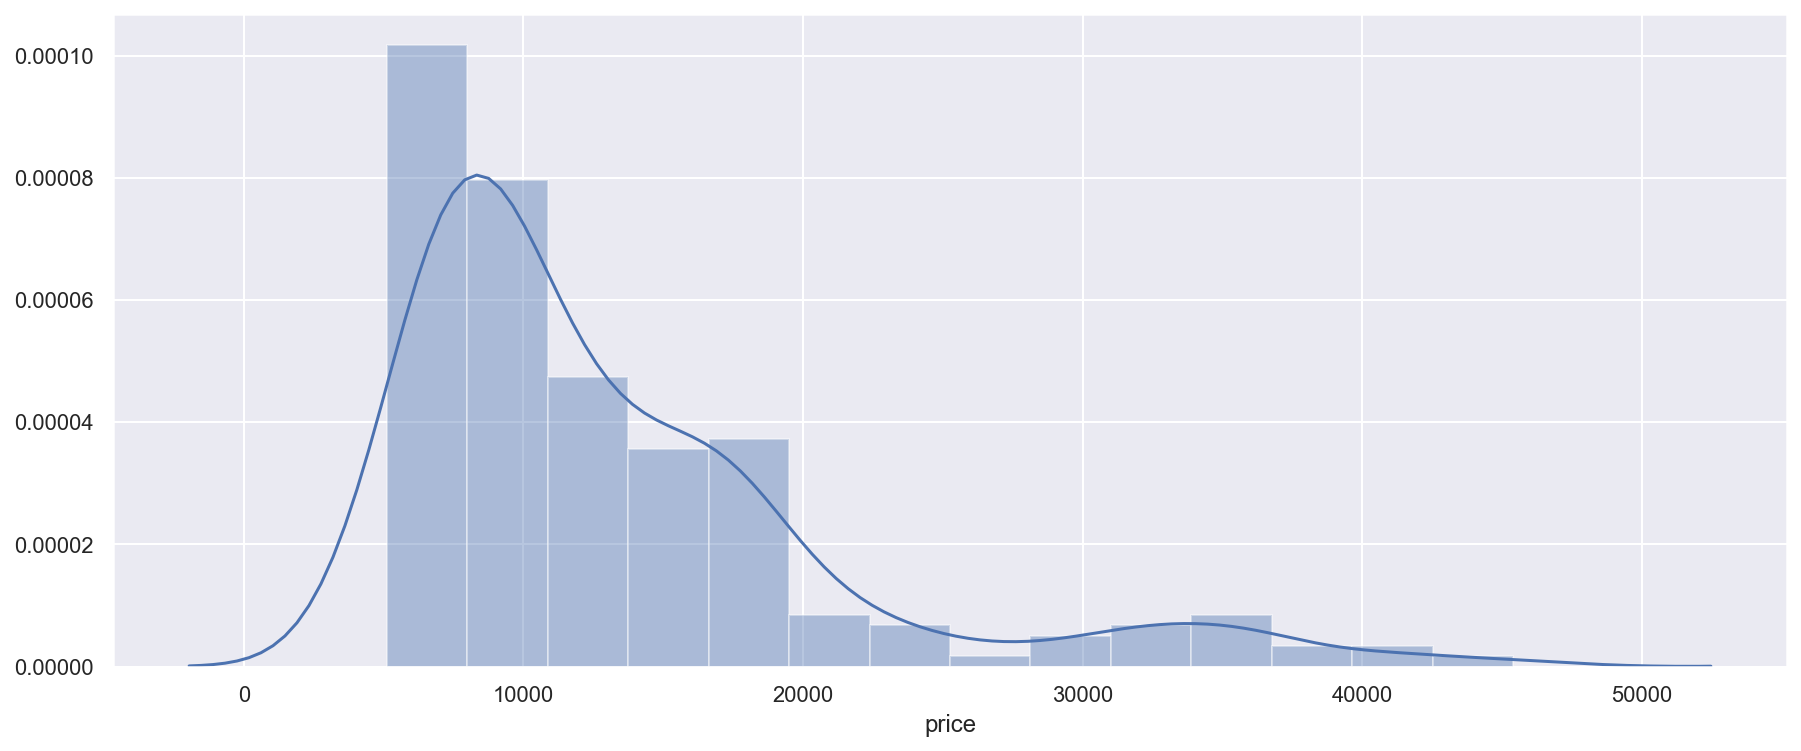

In [17]:
plt.figure(figsize=(15,6))
sns.distplot(price.price)
plt.show()

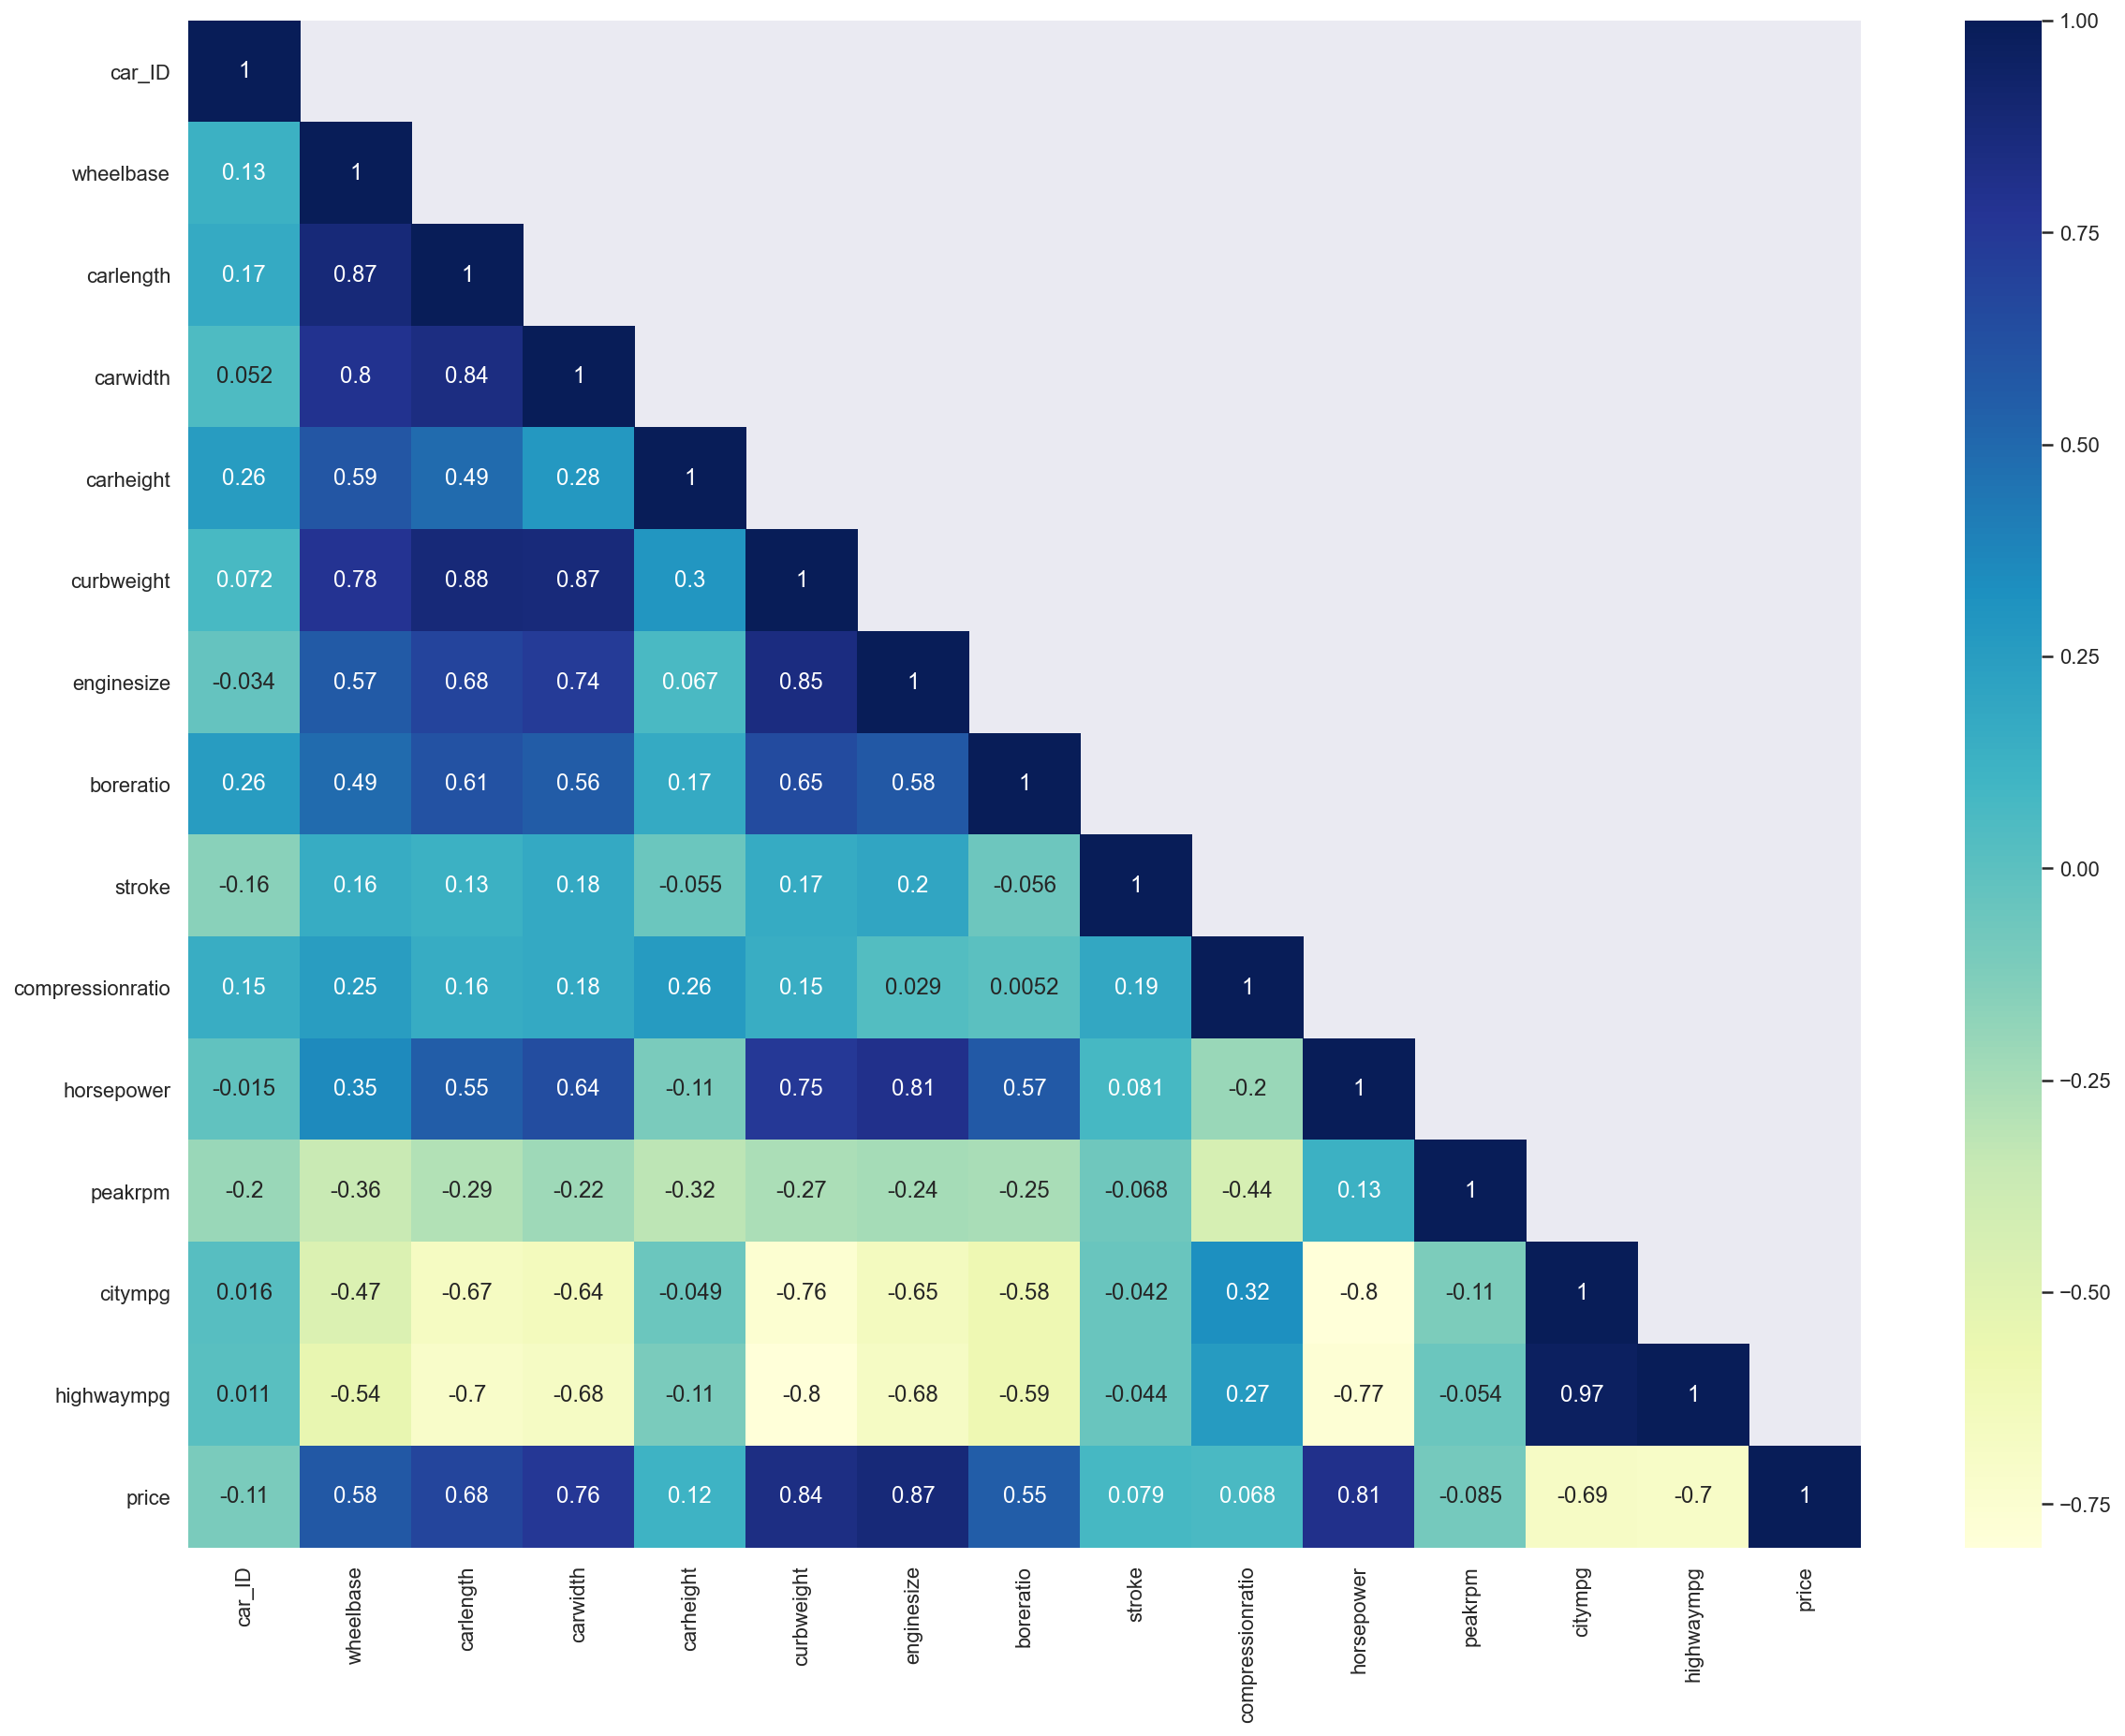

In [18]:
mask = np.array(price.corr())
mask[np.tril_indices_from(mask)] = False

plt.figure(figsize=(20,15))
sns.heatmap(price.corr(),annot=True,cmap='YlGnBu',mask=mask)
plt.show()

In [19]:
# sns.pairplot(price[var_num])
# plt.show()

## Step3: Data preparation

In [20]:
price = price.drop(columns=['car_ID',"CarName"],axis=1)

In [21]:
var_cat = price.select_dtypes(include=["object"]).columns

In [22]:
bin_var = []
dum_var = []
for i in var_cat:
    if (len(price[i].value_counts().values)) <= 2:
        bin_var.append(i)
    else:
        dum_var.append(i)

In [23]:
print(bin_var)
print(dum_var)

['fueltype', 'aspiration', 'doornumber', 'enginelocation']
['symboling', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarCompany']


In [24]:
price[bin_var].head()

,fueltype,aspiration,doornumber,enginelocation
0,gas,std,two,front
1,gas,std,two,front
2,gas,std,two,front
3,gas,std,four,front
4,gas,std,four,front


In [25]:
price.fueltype = price.fueltype.replace({"gas":0,"diesel":1})
price.aspiration = price.aspiration.replace({"std":0,"turbo":1})
price.doornumber = price.doornumber.replace({"four":0,"two":1})
price.enginelocation = price.enginelocation.replace({"rear":0,"front":1})

In [26]:
for i in dum_var:
    price = pd.concat([price,pd.get_dummies(price[i],prefix=i)],axis=1)
    price = price.drop([i],axis=1)

In [27]:
price.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
0,0,0,1,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,0,0,0,0,0,0


## Step4: Data preparation

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
df_train,df_test = train_test_split(price,train_size=0.7,test_size=0.3, random_state=100)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
var_num= ['wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

In [32]:
df_train[var_num] = scaler.fit_transform(df_train[var_num])

In [33]:
y = df_train.pop('price')
X = df_train

In [34]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X,y)

LinearRegression()

In [35]:
from sklearn.feature_selection import RFE
rfe = RFE(lm,15)
rfe = rfe.fit(X,y)

In [36]:
rfe_col = pd.DataFrame()
rfe_col['columns'] = X.columns
rfe_col['support'] = rfe.support_
rfe_col['ranking'] = rfe.ranking_
rfe_col.sort_values(by='ranking').head(15)

,columns,support,ranking
37,enginetype_rotor,True,1
71,CarCompany_saab,True,1
69,CarCompany_porsche,True,1
57,CarCompany_buick,True,1
56,CarCompany_bmw,True,1
55,CarCompany_audi,True,1
44,cylindernumber_two,True,1
43,cylindernumber_twelve,True,1
42,cylindernumber_three,True,1
36,enginetype_ohcv,True,1


In [37]:
col = X.columns[rfe.support_]
col

Index(['enginelocation', 'enginesize', 'symboling_-2', 'enginetype_l',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'CarCompany_audi',
       'CarCompany_bmw', 'CarCompany_buick', 'CarCompany_porsche',
       'CarCompany_saab', 'CarCompany_volvo'],
      dtype='object')

In [38]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
X = X[col]
X = sm.add_constant(X)
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

VIF = pd.DataFrame()
X = X.drop(columns="const")
VIF['Features'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by="VIF",ascending=False)
VIF


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     108.8
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           6.85e-64
Time:                        01:17:27   Log-Likelihood:                -20.073
No. Observations:                 143   AIC:                             70.15
Df Residuals:                     128   BIC:                             114.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.41

,Features,VIF
5,enginetype_rotor,inf
8,cylindernumber_two,inf
1,enginesize,2.57
0,enginelocation,1.71
4,enginetype_ohcv,1.67
14,CarCompany_volvo,1.62
2,symboling_-2,1.52
7,cylindernumber_twelve,1.41
11,CarCompany_buick,1.39
3,enginetype_l,1.28


In [40]:
X = X.drop(columns="cylindernumber_three")

In [41]:
X = sm.add_constant(X)
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

VIF = pd.DataFrame()
X = X.drop(columns="const")
VIF['Features'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by="VIF",ascending=False)
VIF

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     117.9
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           6.71e-65
Time:                        01:17:27   Log-Likelihood:                -20.167
No. Observations:                 143   AIC:                             68.33
Df Residuals:                     129   BIC:                             109.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.41

,Features,VIF
5,enginetype_rotor,inf
7,cylindernumber_two,inf
1,enginesize,2.43
0,enginelocation,1.69
4,enginetype_ohcv,1.65
13,CarCompany_volvo,1.62
2,symboling_-2,1.52
6,cylindernumber_twelve,1.39
10,CarCompany_buick,1.38
9,CarCompany_bmw,1.26


In [42]:
X = X.drop(columns="cylindernumber_twelve")

In [43]:
X = sm.add_constant(X)
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

VIF = pd.DataFrame()
X = X.drop(columns="const")
VIF['Features'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by="VIF",ascending=False)
VIF

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     127.6
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           9.57e-66
Time:                        01:17:27   Log-Likelihood:                -20.727
No. Observations:                 143   AIC:                             67.45
Df Residuals:                     130   BIC:                             106.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4121      0

,Features,VIF
5,enginetype_rotor,inf
6,cylindernumber_two,inf
1,enginesize,2.00
0,enginelocation,1.64
4,enginetype_ohcv,1.63
12,CarCompany_volvo,1.60
2,symboling_-2,1.52
9,CarCompany_buick,1.28
8,CarCompany_bmw,1.23
10,CarCompany_porsche,1.12


In [44]:
X = X.drop(columns="enginelocation")

In [45]:
X = sm.add_constant(X)
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

VIF = pd.DataFrame()
X = X.drop(columns="const")
VIF['Features'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by="VIF",ascending=False)
VIF

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     136.9
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           3.50e-66
Time:                        01:17:27   Log-Likelihood:                -22.365
No. Observations:                 143   AIC:                             68.73
Df Residuals:                     131   BIC:                             104.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2113      0

,Features,VIF
4,enginetype_rotor,inf
5,cylindernumber_two,inf
0,enginesize,1.77
11,CarCompany_volvo,1.55
1,symboling_-2,1.52
3,enginetype_ohcv,1.44
8,CarCompany_buick,1.20
7,CarCompany_bmw,1.09
9,CarCompany_porsche,1.07
2,enginetype_l,1.00


In [46]:
X = X.drop(columns="enginetype_rotor")

In [47]:
X = sm.add_constant(X)
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

VIF = pd.DataFrame()
X_v = X.drop(columns="const")
VIF['Features'] = X_v.columns
VIF['VIF'] = [variance_inflation_factor(X_v.values,i) for i in range(X_v.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by="VIF",ascending=False)
VIF

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     136.9
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           3.50e-66
Time:                        01:17:27   Log-Likelihood:                -22.365
No. Observations:                 143   AIC:                             68.73
Df Residuals:                     131   BIC:                             104.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2113      0

,Features,VIF
0,enginesize,1.77
10,CarCompany_volvo,1.55
1,symboling_-2,1.52
3,enginetype_ohcv,1.44
7,CarCompany_buick,1.20
6,CarCompany_bmw,1.09
4,cylindernumber_two,1.08
8,CarCompany_porsche,1.07
2,enginetype_l,1.00
5,CarCompany_audi,1.00


## 7. Residual analysis of Train data

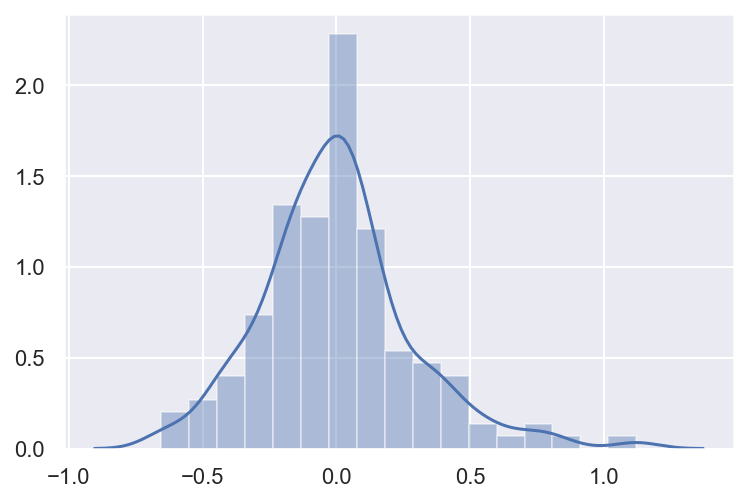

In [48]:
y_pred = lm_1.predict(X)
res = y-y_pred

sns.distplot(res)
plt.show()

## 8: Predictions on test set

In [56]:
df_test[var_num] = scaler.transform(df_test[var_num])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [52]:
df_test = df_test[['price', 'enginesize', 'symboling_-2', 'enginetype_l',
       'enginetype_ohcv', 'cylindernumber_two', 'CarCompany_audi',
       'CarCompany_bmw', 'CarCompany_buick', 'CarCompany_porsche',
       'CarCompany_saab', 'CarCompany_volvo']]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [55]:
df_test

array([[-4.75189241e-01, -5.66893894e-01, -6.52569368e-01,
        -2.27502371e-01, -8.20850076e-01, -6.60242486e-01,
        -4.51443465e-01, -7.06632545e-01, -2.78344634e-01,
        -8.22371755e-01, -6.88236064e-01,  1.88791775e+00,
         2.32052554e+00, -6.83619294e-01],
       [-2.05872178e-01, -1.36751942e-01, -1.54030458e-01,
         8.85788697e-01, -4.87358795e-01, -3.90836149e-01,
        -4.51443465e-01,  4.81417279e-01, -2.78344634e-01,
        -4.43427091e-01,  2.50068824e-01,  2.40832547e-01,
         4.49815662e-01, -5.86314666e-01],
       [ 4.66125686e-02,  3.49149153e-01,  2.99186733e-01,
         6.11286471e-02, -2.84684536e-01, -7.24468409e-02,
         3.17543021e-01,  4.49307824e-01, -3.84120034e-01,
        -4.68690068e-01, -6.88236064e-01,  9.10975287e-02,
         1.62014142e-01, -5.41325737e-01],
       [-6.77177038e-01, -3.75719693e-01, -8.33856245e-01,
        -3.92434381e-01, -5.05783728e-01, -6.60242486e-01,
        -2.59196844e-01, -5.46085272e-01, -1.